# <font color='blue'>Analysis , customer segmentation and Product basket analysis :</font>

#### - Kinsuk Ghatak
#### 9038426200
#### kinsukghatak@gmail.com 


## <font color='red'>A. Exploratory and Descriptive analysis on the transaction data set </font> :

In [1]:
# code EDA : Read the data and the industry mapping : 
import pandas as pd
import numpy as np
df_full=pd.read_excel("C:/Users/KINSUK/Desktop/ab_analytica_assignment/Focus 1/Assignment focus1.xlsx",sheet_name="Sheet1")
df_full.head()
len(df_full)
df_full.info()
print(df_full.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118900 entries, 0 to 118899
Data columns (total 57 columns):
Name                           118900 non-null object
Financial Status               95484 non-null object
Paid at                        93972 non-null object
Fulfillment Status             95484 non-null object
Fulfilled at                   85245 non-null object
Accepts Marketing              95484 non-null object
Currency                       95484 non-null object
Subtotal                       95484 non-null float64
Shipping                       95484 non-null float64
Taxes                          95484 non-null float64
Total                          95484 non-null float64
Discount Code                  62031 non-null object
Discount Amount                95484 non-null float64
Shipping Method                95484 non-null object
Created at                     118900 non-null object
Lineitem quantity              118900 non-null int64
Lineitem name                  118

In [2]:
## Filtering only those transactions which has some status like paid / refunded etc. We have total 95484 such results and 
# a frequency table of the same is provided below to better understand the payment sceanario. 

df_filt=df_full[(df_full['Financial Status'].notnull())]
print(len(df_filt))
pd.crosstab(df_filt['Financial Status'], columns='count')

95484


col_0,count
Financial Status,
paid,91039
partially_refunded,1453
pending,39
refunded,2953


### It's clearly observed that majority of the observations which have some payment status are paid and .

In [3]:
# analysis on booking and shipping country : 
import seaborn as sns
import matplotlib.pyplot as plt
print(pd.crosstab(df_filt['Billing Country'], columns='count').head())
pd.crosstab(df_filt['Shipping Country'], columns='count')

cross=pd.crosstab(index=df_filt['Shipping Country'], columns=df_filt['Shipping Method'])

sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g')
plt.show

## It's clearly observed that majority of the deliveris happened in GB (Great Britain) as well as booked or billed at GB as well 

col_0            count
Billing Country       
AE                   3
AU                  11
BE                   3
BG                   3
BH                   1


<function matplotlib.pyplot.show(*args, **kw)>

#### It's clearly seen that majority of the shipping happened to Great Britain and hence while doing further analysis on zip code wise revenue etc we will only consider GB as the country of map creation because we will also see in later charts that almost 100% of the revenue stream gets generated through shipping in Brtian only. 

In [4]:
# Frequency table fo the successful payments with respect to payment methods : 
df_paid=df_full[(df_full['Financial Status']=="paid")]
len(df_paid)
pd.crosstab(df_filt['Payment Method'], columns='count')
# It's clearly visible that Shopify and Paypal Expresss checkouts havev been used as two top payment methodologies and 
#covers almost 96% of all payments 

col_0,count
Payment Method,
External Debit,1
Pay over time with Klarna,6898
PayPal Express Checkout,38394
PayPal Express Checkout + Pay over time with Klarna,5
PayPal Express Checkout + PayPal Payments Standard,22
PayPal Express Checkout + Shopify Payments,54
PayPal Express Checkout + manual,2
Shopify Payments,49447
Shopify Payments + Pay over time with Klarna,73


col_0               Total Revenue
Financial Status                 
paid                 5.251720e+06
partially_refunded   1.464629e+05
pending              1.993010e+03
refunded             2.212043e+05


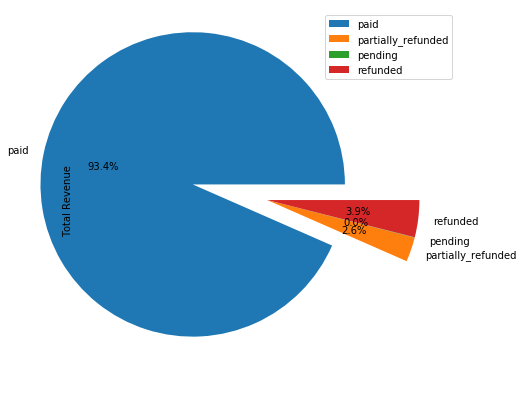

In [6]:
# Analysing total Revenue in various payment status : 
cross_rev=pd.crosstab(index=df_filt['Financial Status'], values=df_filt['Total'],columns='Total Revenue',aggfunc=np.sum)
print(cross_rev)
cross_rev.plot.pie(y='Total Revenue', figsize=(7, 7),autopct='%1.1f%%',explode=(0.5, 0, 0,0))

col_0             Total Revenue
Shipping Country               
GB                 5.619714e+06
GG                 1.849300e+02
IM                 8.981500e+02
JE                 5.827900e+02


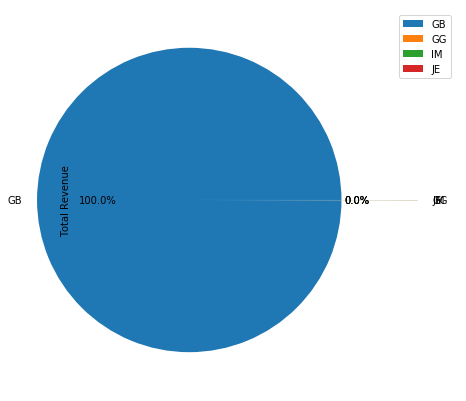

In [5]:
# Analysing total Revenue accross various Country of delivery : 
cross_rev_country=pd.crosstab(index=df_filt['Shipping Country'], values=df_filt['Total'],columns='Total Revenue',aggfunc=np.sum)
print(cross_rev_country)
cross_rev_country.plot.pie(y='Total Revenue', figsize=(7, 7),autopct='%1.1f%%',explode=(0.5, 0, 0,0))

#### So, it's also clearly vsiible that almost 100% of the revnue comes from GB and hence we can safely assume this variable of shipping country won't be having much impact in our modelling 

In [6]:
# Analysing total Revenue accross various methods of discount and promotions  : 

cross_rev_disc=pd.pivot_table(df_filt, index=df_filt['Discount Code'],values=['Total','Discount Amount'],aggfunc=np.sum).sort_values(by=['Discount Amount','Total'],ascending=False).reset_index()

cross_rev_disc['perc_sales'] = round(100*cross_rev_disc['Total']/cross_rev_disc['Total'].sum(),2)
cross_rev_disc['perc_disc'] = round(100*cross_rev_disc['Discount Amount']/cross_rev_disc['Discount Amount'].sum(),2)
cross_rev_disc['Cumulative_sales_percent']=cross_rev_disc['perc_sales'].cumsum()
cross_rev_disc['Cumulative_discount_percent']=cross_rev_disc['perc_disc'].cumsum()
print("Total number of unique discount strategies %d : "  % len(cross_rev_disc['Discount Code'].unique()))
cross_rev_disc.head(20)


Total number of unique discount strategies 368 : 


,Discount Code,Discount Amount,Total,perc_sales,perc_disc,Cumulative_sales_percent,Cumulative_discount_percent
0,GREEDY20,163564.26,656512.81,17.27,16.76,17.27,16.76
1,DAZLIN20,111202.55,446254.33,11.74,11.39,29.01,28.15
2,BLC21,81667.73,308329.37,8.11,8.37,37.12,36.52
3,QUEENOFCLEAN,77053.12,309677.18,8.14,7.90,45.26,44.42
4,BLACKSWAN20,30484.97,121996.20,3.21,3.12,48.47,47.54
5,TWINKLEDUO20,29288.92,118216.76,3.11,3.00,51.58,50.54
6,Love20,29072.86,116515.07,3.06,2.98,54.64,53.52
7,NUMBER6120,23710.05,95089.08,2.50,2.43,57.14,55.95
8,JANSWAN20,20775.05,83142.67,2.19,2.13,59.33,58.08
9,SWANBOXING20,20226.29,80940.50,2.13,2.07,61.46,60.15


#### It's clearly visible that thought there may be a total of 368 different discount strategies but almso 78% of sales happen through the top 20 discount strategies when sorted with respect to the discount amount. 

#### We have aggregated the cumulative discount percentage and cumulative sales happening tyhrough that discount strategy and it's clearly visible that top 25 strategies are resulting almost 80% of sales and top 5 stratgies result in 50% of sales.

## <font color='red'>B. Analysis on line items & Customer id , Sales Trend  : </font>

In [7]:
## To analyse total number of unique line items and customers : 

cross_item=pd.pivot_table(df_filt, index=df_filt['Lineitem name'],values=['Total','Lineitem quantity'],aggfunc=np.sum).sort_values(by=['Total'],ascending=False).reset_index()
cross_item['perc_sales_val'] = round(100*cross_item['Total']/cross_item['Total'].sum(),2)
cross_item['perc_sales_vol'] = round(100*cross_item['Lineitem quantity']/cross_item['Lineitem quantity'].sum(),2)

cross_item['Cumulative_sales_percent_val']=cross_item['perc_sales_val'].cumsum()
cross_item['Cumulative_sales_percent_vol']=cross_item['perc_sales_vol'].cumsum()
cross_item.head(50)
print("Total number of unique Line Items %d : "  % len(df_filt['Lineitem sku'].unique()))
print("Total number of unique Customers %d : "  % len(df_filt.Id.unique()))

Total number of unique Line Items 898 : 
Total number of unique Customers 58035 : 


In [8]:
##Analysis of product SKU wise revenue generation :

df_revenue= df_full.groupby('Lineitem sku').agg({'Lineitem quantity': lambda qty: qty.sum(),
                                        'Total': lambda price: price.sum()}).sort_values(by=['Total'],ascending=False).reset_index()

df_revenue['perc_sales_rev'] = round(100*df_revenue['Total']/df_revenue['Total'].sum(),2)
df_revenue['Cumulative_sales_percent']=df_revenue['perc_sales_rev'].cumsum()

df_revenue.head(10)

,Lineitem sku,Lineitem quantity,Total,perc_sales_rev,Cumulative_sales_percent
0,SC15820N,3801,568389.53,10.11,10.11
1,SC15822N,2815,339881.05,6.05,16.16
2,SI12020N,6681,167053.52,2.97,19.13
3,SC15834N,1851,126870.33,2.26,21.39
4,SI12022N,3918,113225.28,2.01,23.40
5,SC15824N,1076,106943.79,1.90,25.30
6,SM22036WHTN,1302,86049.61,1.53,26.83
7,SM22036GRYN,1315,83448.23,1.48,28.31
8,SK14610GRYN,2239,81020.05,1.44,29.75
9,SWPS5020GRN,1449,80504.36,1.43,31.18


In [ ]:
## Postal code wise sales value analysis :

import folium
import pgeocode


df_full_uk=df_full[(df_full['Shipping Country'] == "GB")]
df_sales_zip_uk= df_full_uk.groupby('Shipping Zip').agg({'Name': lambda qty: qty.count()}).sort_values(by=['Name'],ascending=False).reset_index()

nomi = pgeocode.Nominatim("gb")

dfzip = df_sales_zip_uk["Shipping Zip"].apply(lambda x:nomi.query_postal_code(x))
dfzip_final_uk = pd.concat([df_sales_zip_uk, dfzip], axis="columns")
dfzip_final_uk.head()
#for each row in the df_sales_zip dataset, plot the corresponding latitude and longitude on the map


In [ ]:
## Creation of heatmap for Great Britain : 

from folium import plugins
from folium.plugins import HeatMap

dfzip_final_uk_NoNaN=dfzip_final_uk[(dfzip_final_uk['latitude'].notnull()) & (dfzip_final_uk['longitude'].notnull())]

map_uk = folium.Map(location=[51.5074, 0.1278], zoom_start = 6) 


for i,row in dfzip_final_uk_NoNaN.iterrows():
    folium.CircleMarker((row.latitude,row.longitude), radius=3, weight=2, color='red', fill_color='red', fill_opacity=.5).add_to(map_uk)

    
map_uk.add_child(plugins.HeatMap(data=dfzip_final_uk_NoNaN[['latitude', 'longitude','Name']].as_matrix(), radius=15, blur=5))

# save the map as an html
map_uk.save('map_uk_heatmap.html')
map_uk



               Lineitem quantity         Total
Purchase_Year                                 
2016                        4280  1.492639e+05
2017                       10658  3.802519e+05
2018                        9285  3.426673e+05
2019                       20448  1.138636e+06
2020                       77263  3.610561e+06


CAGR of Sales growth in percentage : 89.114139




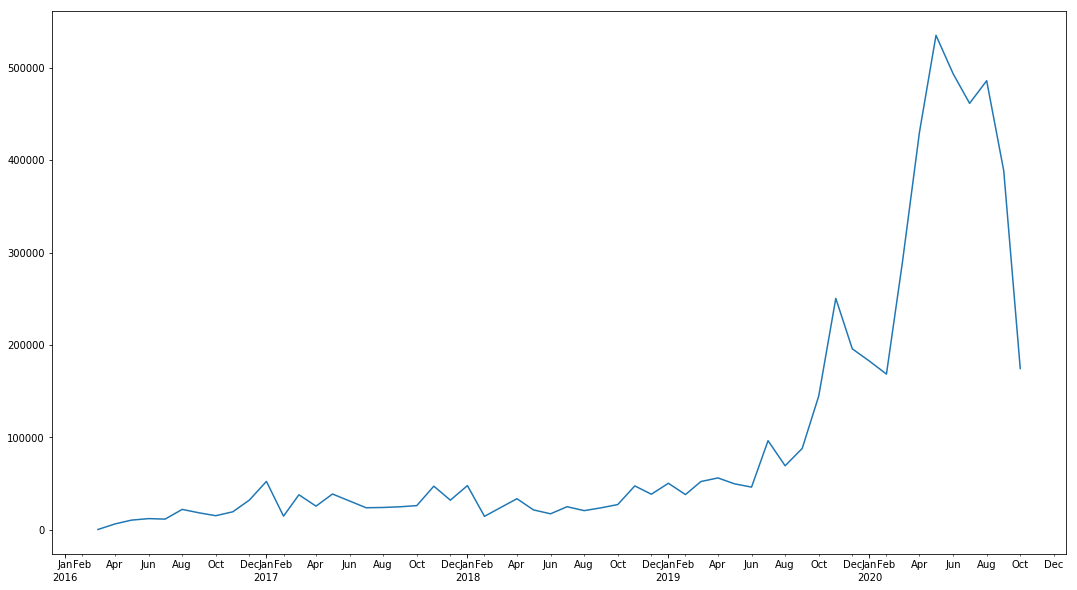

In [256]:
## Time series analysis of the data : 

from datetime import datetime
import seaborn as sns 
import matplotlib.pyplot as plt

import matplotlib.dates
from datetime import datetime


df_full['Purchase_Date']=pd.to_datetime(df_full['Created at'].str[:10],format='%Y-%m-%d')

df_full['Purchase_year_month']=df_full['Purchase_Date'].dt.to_period('M').dt.to_timestamp()

df_full['Purchase_Year']= df_full['Purchase_Date'].dt.year
df_year_sales=pd.pivot_table(df_full, index=df_full['Purchase_Year'],values=['Total','Lineitem quantity'],aggfunc=np.sum)
print(df_year_sales.head())

cagr_sales_val=cagr_sales_val=(((df_year_sales.iloc[4,1]/df_year_sales.iloc[0,1])**(1/len(df_year_sales)))-1)*100

print("\n")
print("CAGR of Sales growth in percentage : %f" %cagr_sales_val)

print("\n")

cross_timeseries=pd.pivot_table(df_full, index=df_full['Purchase_year_month'],values=['Total','Lineitem quantity'],aggfunc=np.sum).sort_values(by=['Purchase_year_month'],ascending=True).reset_index()

cross_timeseries.head()


fig=plt.figure(figsize=(40, 10))
ax = fig.add_subplot(121)
ax.plot(cross_timeseries['Purchase_year_month'],cross_timeseries['Total'])

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((1,2,4,6,8,10,12)))

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
 
plt.show()


#### So, from the plot ; it seems like though there is no major periodic trend but seems like the sales kind of goes up during winters ; specifically during the months of Dec-Feb every year we can observe some kind of perioidic peaks. 

#### It might be a trend that can be explored further through secondary research and then can be validated upon. 

#### The good thing is that this brand is seeing a steady increase in sales and on a Y-oY basis the level of increase is around 90% and which is definitely an encouraging story for this brand. 

## <font color='red'>C. RFM Segmentation analysis for customer segementation :  </font>

In [258]:
# applying RFM method for segmentation : 
from datetime import date
today = datetime.now()


rfm_df= df_full.groupby('Name').agg({'Purchase_Date': lambda date: (today - date.max()).days,
                                        'Lineitem quantity': lambda qty: qty.sum(),
                                        'Total': lambda price: price.sum()})

rfm_df.columns=['recency','frequency','monetary']

print(rfm_df.head())

rfm_df=rfm_df.dropna()

#normalisation of the RFM columns to bring erverything at the same level : 
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(rfm_df)
rfm_normalized = scaler.transform(rfm_df)
 

rfm_df_normalized = pd.DataFrame(rfm_normalized, index=rfm_df.index, columns=rfm_df.columns)
print(rfm_df_normalized.head())

        recency  frequency  monetary
Name                                
#10000     1228          1     14.99
#10001     1228          1     89.99
#10002     1228          1     14.99
#10003     1228          1     14.99
#10004     1228          1     69.99
         recency  frequency  monetary
Name                                 
#10000  1.845145  -0.349837 -0.662705
#10001  1.845145  -0.349837  0.469931
#10002  1.845145  -0.349837 -0.662705
#10003  1.845145  -0.349837 -0.662705
#10004  1.845145  -0.349837  0.167895


C:\Users\KINSUK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\KINSUK\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


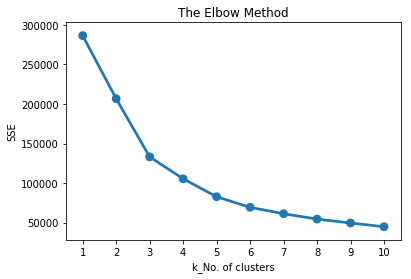

In [259]:
## To analyse and reach optimum number of clusters: 

from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_df_normalized.dropna())
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k_No. of clusters')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

#### Post completing the elbow curve it seems that ther curve reaches it's inflection point at K=4 ; i.e post k=4 the rate of change or decrease of SSE w.r.t newer addition of clusters is not that significant and hence we finalise 4 as our final number of segments. 

In [260]:
## Fitting the model with k=4 clusters on the rfm dataset : 

model = KMeans(n_clusters=4, random_state=42)
model.fit(rfm_df_normalized.dropna())
model.labels_.shape

rfm_df["Cluster"] = model.labels_
rfm_df.groupby('Cluster').agg({
    'recency':'mean',
    'frequency':'sum',
    'monetary':['sum','mean', 'count']}).round(2)

recency frequency    monetary               
            mean       sum         sum    mean  count
Cluster                                              
0         546.72     20407   788171.34  145.12   5431
1         315.51     80972  3882993.51   53.15  73052
2        1249.64     19425   563245.20   34.55  16300
3         711.83      1130   386969.87  552.03    701

#### So, post completing the RFM segmentation consdiering "Name" as the unique identifier of the data we see that Segment 1 of customers have the highest lifetime value or the monetary value along with most number of purchases.  

##### After this we merged back the cluster details to the original dataset.

In [262]:
## Merging all the customer segment information to the original data set : 

# rfm_df=rfm_df.reset_index()
rfm_name_clust=rfm_df[['Name','Cluster']]
rfm_name_clust.head()

df_segment_full=df_full.merge(rfm_name_clust, on='Name', how='left')

df_segment_full.head()
df_segment_full.groupby('Cluster').agg({
    'Name':'count'}).round(2)

,Name
Cluster,
0,19171
1,80012
2,18645
3,1072


#### The above table represents segment wise customer counts and in line with the revenue break up it's clearly seen that customer counts are also highest in segement 1. 

## <font color='red'>D. Product Basket Analysis :   </font>

In [35]:
df_basket_total=df_full[['Name','Lineitem name','Lineitem sku','Lineitem quantity']]
df_item_sku_map=pd.DataFrame(df_full.groupby(['Lineitem name','Lineitem sku']).size().reset_index(name='Freq'))

In [38]:
market_basket = df_basket_total.groupby(
                ['Name', 'Lineitem sku'])['Lineitem quantity']
market_basket = market_basket.sum().unstack().reset_index().fillna(0).set_index('Name')
market_basket.head()

Lineitem sku,HL02,SA100,SAC16810N,SB1041N,SBR104,SBR204,SBS75,SC15810N,SC15810N01,SC15810N02,...,SWU10L,SWU16L,SWU20L,SWU26L,SWU5LS,SWU8001,SWU8L,SWU8L001,SWU8P,SWU8S
Name,,,,,,,,,,,,,,,,,,,,,
#10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#10001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#10003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#10004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
## One hot encoding of the different SKUs to understand which are bought tohgether. 

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = market_basket.applymap(encode_units)
# basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.head()

Lineitem sku,HL02,SA100,SAC16810N,SB1041N,SBR104,SBR204,SBS75,SC15810N,SC15810N01,SC15810N02,...,SWU10L,SWU16L,SWU20L,SWU26L,SWU5LS,SWU8001,SWU8L,SWU8L001,SWU8P,SWU8S
Name,,,,,,,,,,,,,,,,,,,,,
#10000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#10001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#10002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#10003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#10004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
#Now that the data is structured properly, we can generate frequent item sets that have a support of at least 7%

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets = apriori(basket_sets, min_support=0.007, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.019679,(SC15812N)
1,0.039588,(SC15820N)
2,0.029335,(SC15822N)
3,0.011122,(SC15824N)
4,0.010106,(SC15830N)
5,0.019302,(SC15834N)
6,0.007310,(SC17310N)
7,0.007467,(SDMCD1000)
8,0.042028,(SF21020N)
9,0.009101,(SFA23010N)


In [100]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SK14610GRYN),(ST14620GRYN),0.023355,0.010808,0.007698,0.329596,30.495333,0.007445,1.475517
1,(ST14620GRYN),(SK14610GRYN),0.010808,0.023355,0.007698,0.712209,30.495333,0.007445,3.393596


#### So, through the product basket analysis , applying the apriory algorithm we can see that two products from the entire list has a higher possibility of getting bought together and they are SKUs :SK14610GRYN(Kettle)	(ST14620GRYN (Toaster) .

#### From a business standpoint this makes sense as well , both of the toaster and kettle are breakfast equipments and hence it makes perfect sense if they are bought together. 

#### Upon reducing the threshold value of minimum support in the apriory set up this rules with atecedent and consequents may even further go up but we have any way set a very low cut off and hence reducing it further makes not much sense. 